## June 2012 Derecho DVN RAOB 29 June 2012

In [1]:
from __future__ import print_function, division
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skewt import SkewT

'''
Davenport IA RAOB Profile at 1200 UTC 29 June 2012
'''

raobprof = 'raob_dvn_1200.txt'

pressure_mb,height,temperature_c,dewpoint_c,RH_pct,mixrat = np.loadtxt(raobprof, usecols=range(0, 6), unpack=True)
thetae = np.loadtxt(raobprof, usecols=(9,), unpack=True)

press = pressure_mb.tolist()
print("Pressure : ", press, len(press))
height_m = height.tolist()
print("Height : ", height_m, len(height_m))
height_km = height/1000
print(len(height_m))
pressure_pa = pressure_mb
dewpoint = dewpoint_c + 273.15
L_vapor = 2500

wetbulb = temperature_c*(np.arctan(0.151977*((RH_pct+8.313659)**0.5))) + (np.arctan(temperature_c+RH_pct)) - (np.arctan(RH_pct-1.676331))+((0.00391838*(RH_pct**1.5))*(np.arctan(0.023101*RH_pct))) - 4.686035
WBD = temperature_c - wetbulb
satmixrat = (6.11*(10**((7.5*temperature_c)/(237.7+temperature_c))))/1000
print("Sat_mix_ratio = ",satmixrat)
mixrat_calc = (6.11*(10**((7.5*dewpoint_c)/(237.7+dewpoint_c))))/1000
mixrat_raob = mixrat/1000
print("Calculated mix_ratio = ", mixrat_calc)
print("RAOB Mix_ratio = ", mixrat_raob)
thetaw = thetae - (L_vapor*mixrat_calc)
thetaw_raob = thetae - (L_vapor*mixrat_raob)
tempvirt = temperature_c*(1+(0.61*(mixrat_calc)))
tempvirt_raob = temperature_c*(1+(0.61*(mixrat_raob)))
tempvirt_c = tempvirt 
tempvirt_c_raob = tempvirt_raob 
print("Virtual Temperature (C) = ",tempvirt_c)
print("Virtual Temperature (C) RAOB = ",tempvirt_c_raob)
tempvirt_exc = tempvirt_c - temperature_c
tempvirt_exc_raob = tempvirt_c_raob - temperature_c
temperature = temperature_c + 273.15
 
#Calculation for the 670 - 850 mb layer
T_sfc = temperature[13]
T_sfc_K = T_sfc + 273.15
T_top = temperature[26]
thetaw_sfc = thetaw[26]
wetbulb_sfc = wetbulb[13]
wetbulb_top = wetbulb[26]
delta_z = 2127
delta_zkm = 2.127
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc_K-thetaw_sfc)/T_sfc_K) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
print("Calculation for the 670 - 850 mb layer: ")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

#RAOB Calculation for the 670 - 850 mb layer
T_sfc = temperature[13]
T_sfc_K = T_sfc + 273.15
T_top = temperature[26]
thetaw_sfc = thetaw_raob[26]
wetbulb_sfc = wetbulb[13]
wetbulb_top = wetbulb[26]
delta_z = 2127
delta_zkm = 2.127
gamma = (T_sfc - T_top)/(delta_zkm)
gamma_wb = (wetbulb_sfc - wetbulb_top)/(delta_zkm)
DCAPE = 0.5 * 9.81 * ((T_sfc_K-thetaw_sfc)/T_sfc_K) * delta_z
W_max = ((2*DCAPE)**0.5)*1.94384
 
print("RAOB Calculation for the 670 - 850 mb layer: ")
print("Gamma = ", gamma)
print("Wetbulb Gamma = ", gamma_wb)
print("DCAPE = ", DCAPE)
print("Downdraft Wmax = ", W_max)

mydata=dict(zip(('hght','pres','temp','dwpt','thtae','thetaw','wetbulb','depression','tempvirt','tempvirt_exc'),(height_m,pressure_mb,temperature_c,dewpoint_c,thetae,thetaw,wetbulb,WBD,tempvirt_c,tempvirt_exc)))
print(mydata)

Pressure :  [985.0, 973.0, 961.0, 952.0, 948.0, 943.5, 943.0, 936.0, 925.0, 911.8, 907.0, 880.7, 851.0, 850.0, 835.0, 821.3, 792.9, 787.0, 772.0, 765.3, 761.0, 746.0, 738.3, 724.0, 700.0, 686.0, 661.8, 637.8, 624.0, 614.5, 590.0, 584.0, 579.0, 569.6, 528.0, 507.1, 500.0, 487.4, 479.0, 478.0, 475.0, 469.0, 468.3, 465.0, 460.0, 423.0, 415.0, 401.0, 400.0, 398.4, 348.0, 339.0, 330.0, 322.5, 314.0, 300.0, 291.0, 282.7, 273.0, 250.0, 246.9, 240.0, 226.0, 216.0, 206.0, 200.0, 199.0, 188.0, 186.1, 186.0, 179.0, 169.1, 166.0, 154.0, 150.0, 146.0, 136.0, 133.0, 130.0, 129.0, 125.8, 115.0, 113.7, 111.0, 110.0, 108.0, 106.0, 104.0, 102.7, 100.0] 90
Height :  [229.0, 337.0, 447.0, 531.0, 568.0, 610.0, 615.0, 682.0, 787.0, 914.0, 961.0, 1219.0, 1521.0, 1531.0, 1686.0, 1829.0, 2134.0, 2198.0, 2363.0, 2438.0, 2486.0, 2656.0, 2743.0, 2909.0, 3192.0, 3361.0, 3658.0, 3962.0, 4143.0, 4267.0, 4596.0, 4679.0, 4748.0, 4877.0, 5478.0, 5791.0, 5900.0, 6096.0, 6229.0, 6245.0, 6293.0, 6390.0, 6401.0, 6455.0, 65

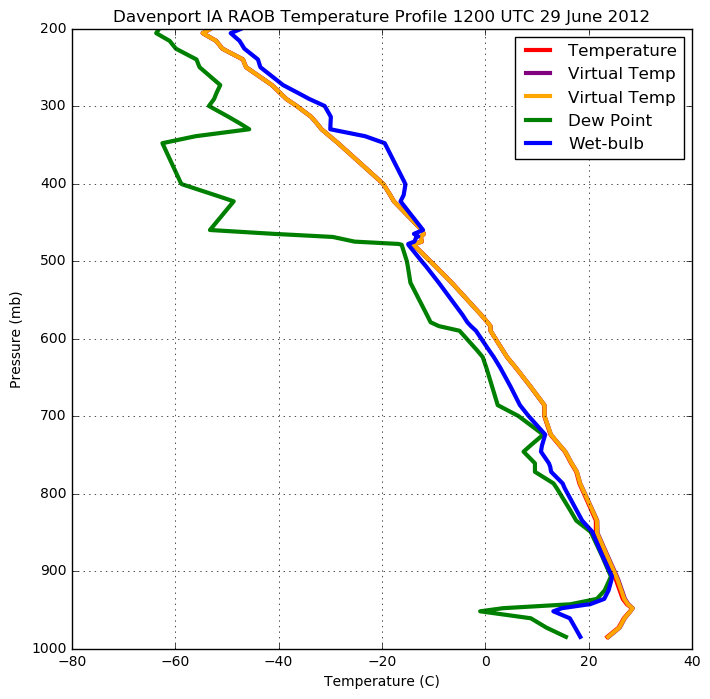

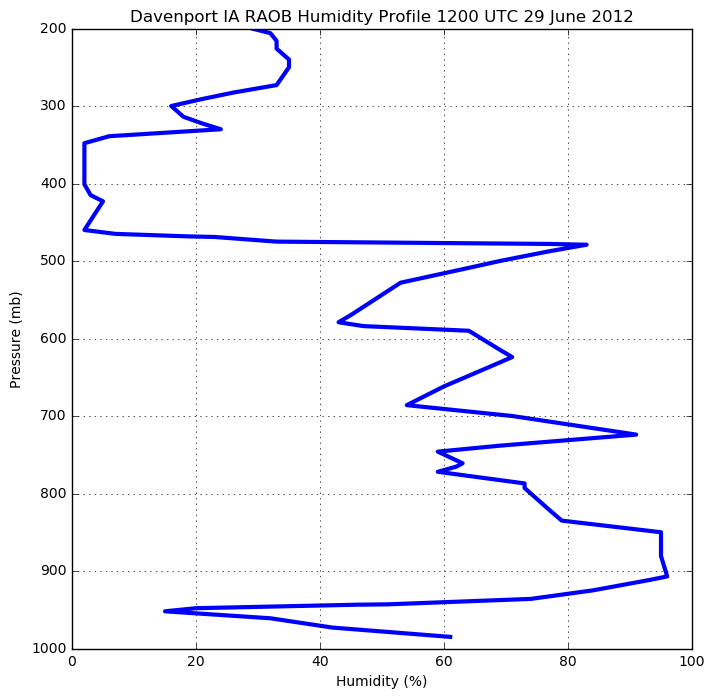

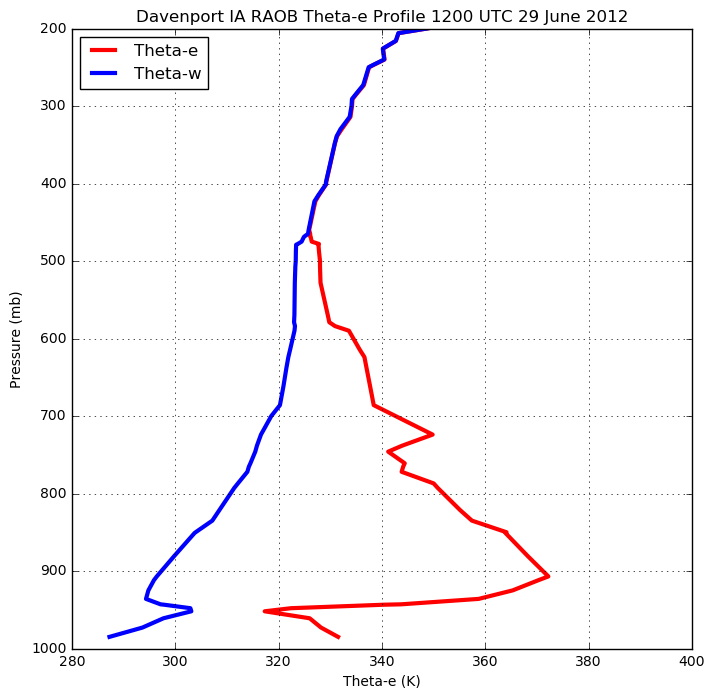

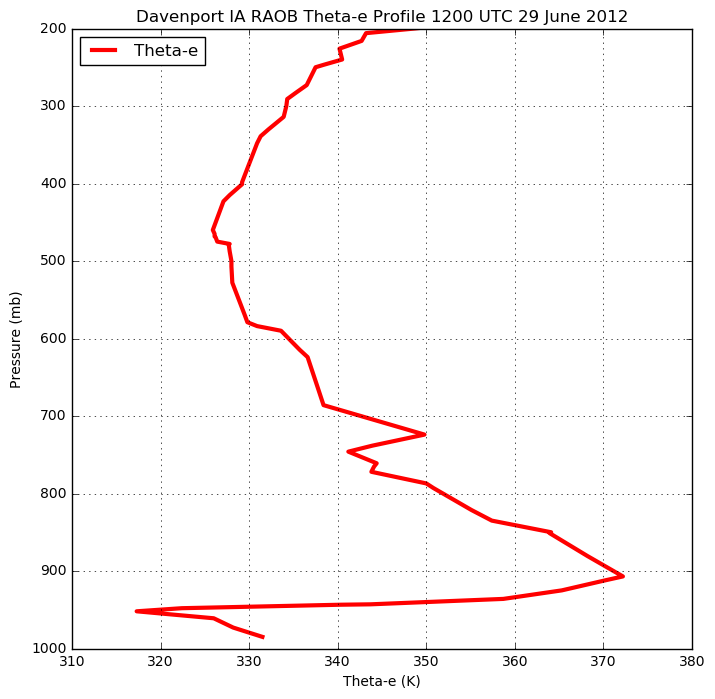

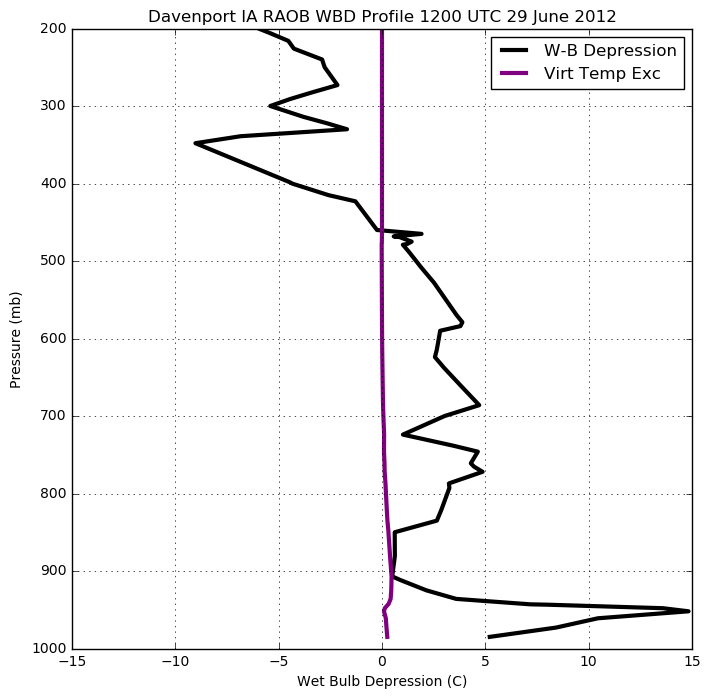

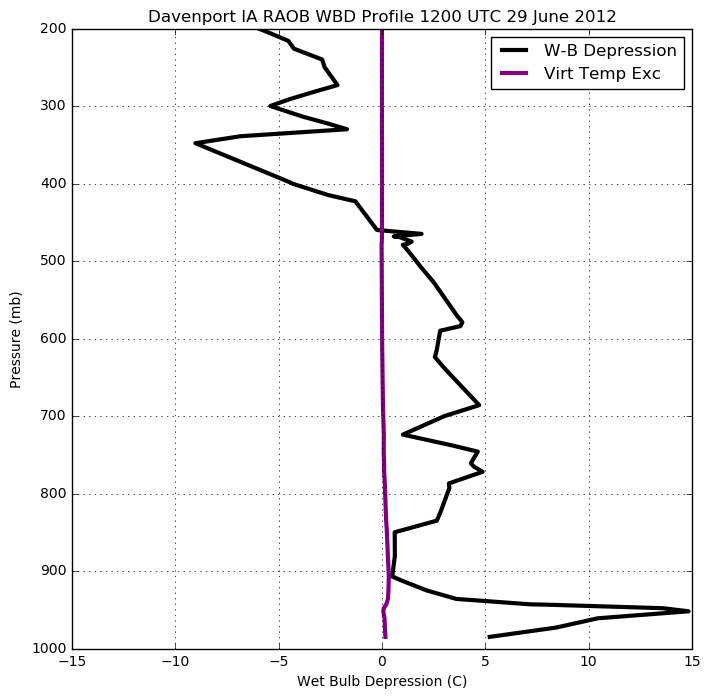

In [5]:
fig = plt.figure(figsize=(8,8))
plt.plot(temperature_c,pressure_pa,color='red',linewidth=3,label='Temperature')
plt.plot(tempvirt_c,pressure_pa,color='purple',linewidth=3,label='Virtual Temp')
plt.plot(tempvirt_c_raob,pressure_pa,color='orange',linewidth=3,label='Virtual Temp')
plt.plot(dewpoint_c,pressure_pa,color='green',linewidth=3,label='Dew Point')
plt.plot(wetbulb,pressure_pa,color='blue',linewidth=3,label='Wet-bulb')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Temperature (C)")
plt.title("Davenport IA RAOB Temperature Profile 1200 UTC 29 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("raob_dvn_temp_press_1200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(RH_pct,pressure_pa,color='blue',linewidth=3)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Humidity (%)")
plt.title("Davenport IA RAOB Humidity Profile 1200 UTC 29 June 2012")
plt.grid(True)
plt.savefig("raob_dvn_humidity_press_1200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.plot(thetaw,pressure_pa,color='blue',linewidth=3,label='Theta-w')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Davenport IA RAOB Theta-e Profile 1200 UTC 29 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("raob_dvn_thtae_press_1200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(thetae,pressure_pa,color='red',linewidth=3,label='Theta-e')
plt.xlim(310,380)
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Theta-e (K)")
plt.title("Davenport IA RAOB Theta-e Profile 1200 UTC 29 June 2012")
plt.grid(True)
plt.legend(loc='upper left')
plt.savefig("dvn_thtae_1200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Davenport IA RAOB WBD Profile 1200 UTC 29 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("dvn_wbd_press_1200.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(WBD,pressure_pa,color='black',linewidth=3,label='W-B Depression')
plt.plot(tempvirt_exc_raob,pressure_pa,color='purple',linewidth=3,label='Virt Temp Exc')
plt.ylim(1000,200)
plt.ylabel("Pressure (mb)")
plt.xlabel("Wet Bulb Depression (C)")
plt.title("Davenport IA RAOB WBD Profile 1200 UTC 29 June 2012")
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig("raob_dvn_wbd_press_1200.png",dpi=250,bbox_inches='tight')
plt.show()


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 907.0hPa
TCs :  25.0C
TDs :  24.3C
-------------
Plcl: 898.3hPa
Tlcl:  24.2C
Plfc: 888.5hPa
P_el: 127.8hPa
CAPE:6483.7J
CIN:   -0.4J
(907.0, 25.0, 24.300000000000001, 'mu')
CAPE =  6483.65687902
Figure saved


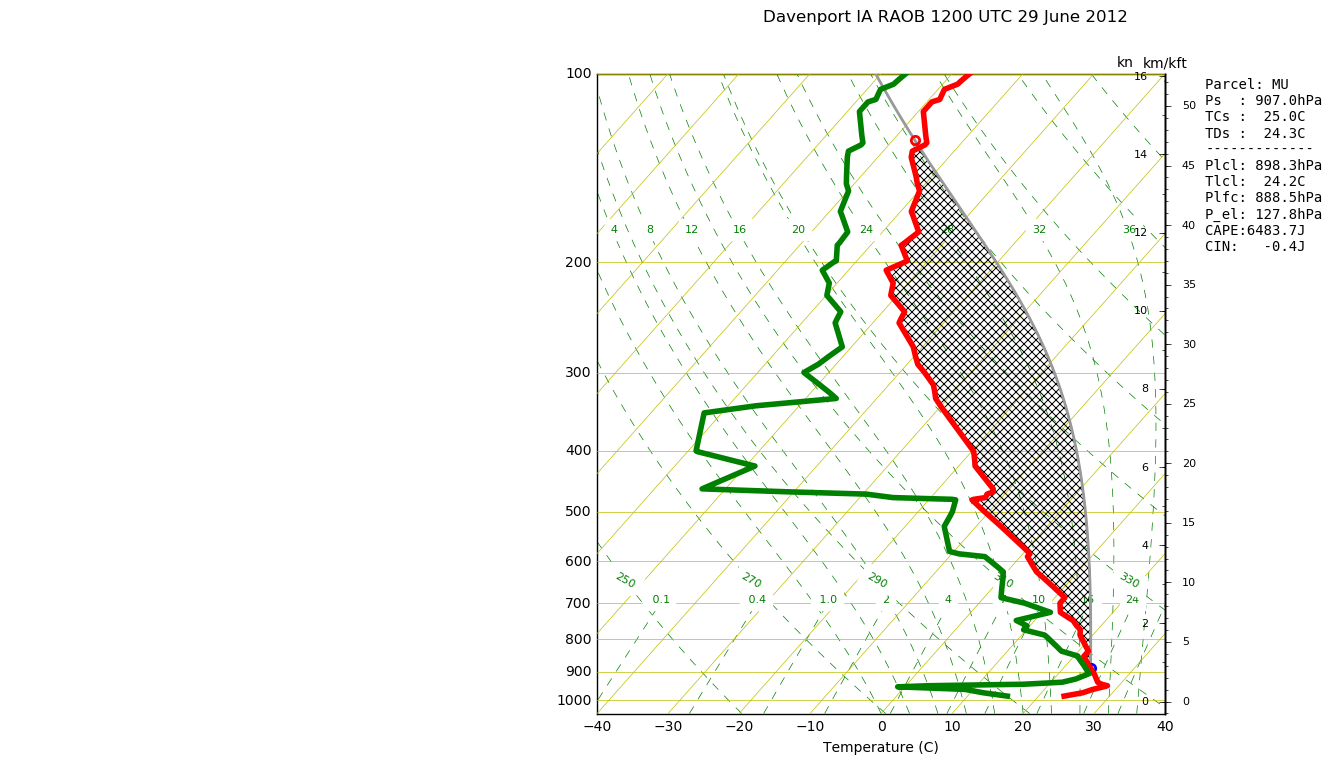

Z_UP =  3.658
P_UP =  661.8
T_UP =  281.85
TD_UP =  274.45
Z_LO =  1.531
P_LO =  850.0
T_LO =  294.55
TD_LO =  293.65
DD_UP =  7.4
DD_LO =  0.9
DDD =  0
Gamma =  5.9708509638
MWPI_IRv1 =  70.8074197539
WGP_IR =  61.007618214
MWPI_IRv2 =  7.67782707177
WGP_IRv2 =  64.6568354403
T_UP_mid =  [ 8.7]
T_LO_mid =  [ 21.4]
TD_LO_mid =  [ 293.65]
Tdiff =  [ 12.7]
DD_LO =  [-272.25]
ST =  3
MT =  1
HI =  4
Tdiff =  12.7
DD_LO =  0.9
ST =  1
MT =  1
HI =  2
Tdiff =  [ 12.7]
DD_LO =  [-272.25]
ST =  3
MT =  1
HI =  4
Haines Index MID =  4
Haines Index HIGH =  2
C-Haines Index =  4

---- Lifted Parcel Quantities ----
Parcel: SB
Ps  : 985.0hPa
TCs :  23.6C
TDs :  15.6C
-------------
Plcl: 875.8hPa
Tlcl:  13.8C
Plfc: 507.9hPa
P_el: 479.5hPa
CAPE:   0.0J
CIN: -1124.9J
(985.0, 23.600000000000001, 15.6, 'sb')
CAPE =  0.0
Figure saved


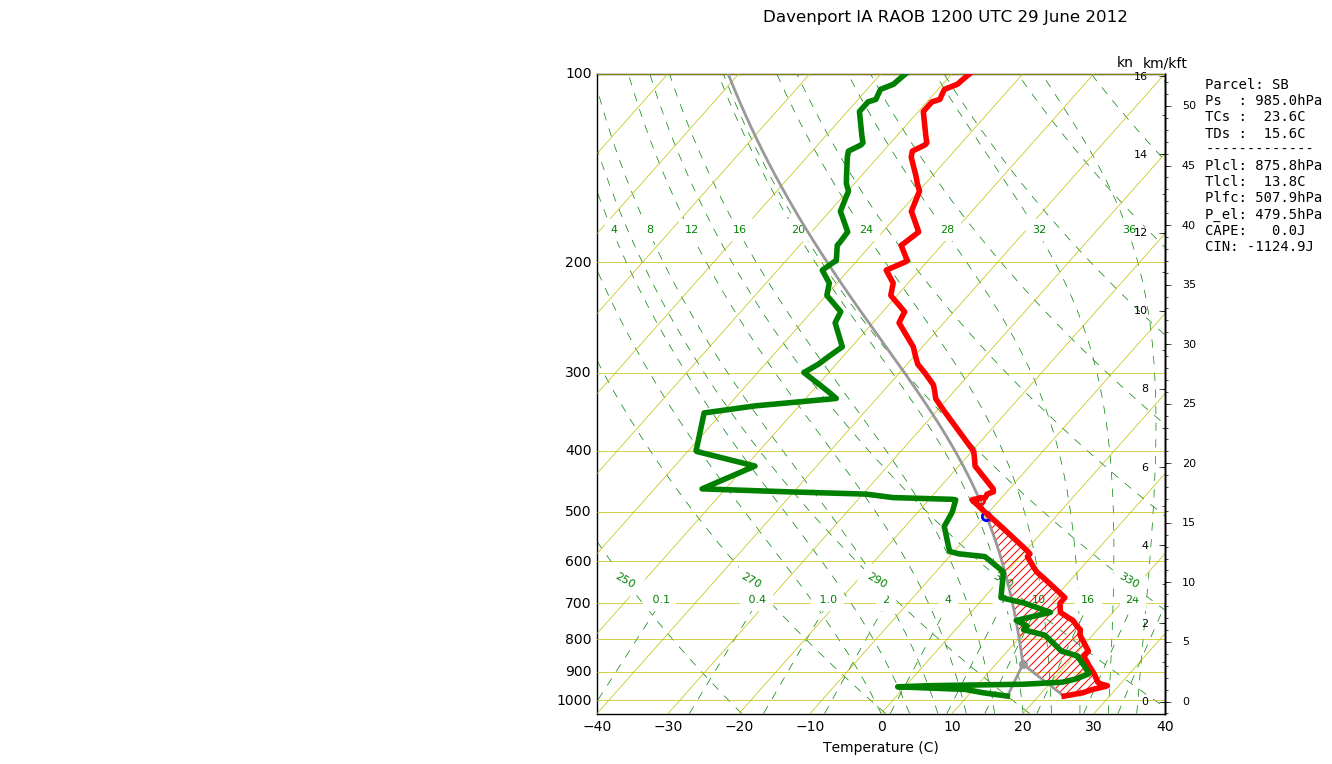

Z_UP =  3.658
P_UP =  661.8
T_UP =  281.85
TD_UP =  274.45
Z_LO =  1.531
P_LO =  850.0
T_LO =  294.55
TD_LO =  293.65
DD_UP =  7.4
DD_LO =  0.9
DDD =  0
Gamma =  5.9708509638
MWPI_IRv1 =  5.9708509638
WGP_IR =  31.4875284438
MWPI_IRv2 =  1.19417019276
WGP_IRv2 =  35.8706294492

---- Lifted Parcel Quantities ----
Parcel: MWPI
Ps  : 850.0hPa
TCs :  21.4C
TDs :  20.5C
-------------
Plcl: 839.2hPa
Tlcl:  20.3C
Plfc: 770.0hPa
P_el: 144.9hPa
CAPE:4824.1J
CIN:  -11.9J
(850.0, 21.399999999999999, 20.5, 'mwpi')
CAPE =  0.0
Figure saved


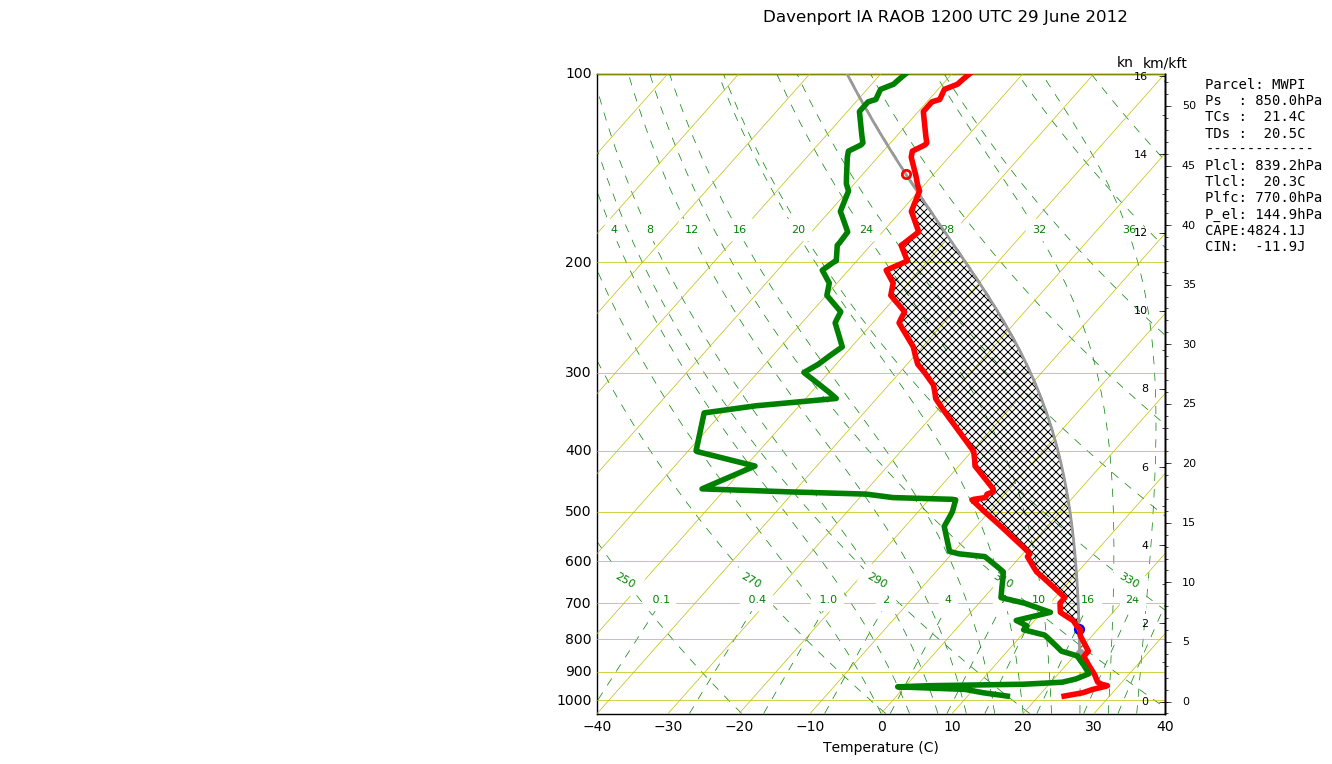


---- Lifted Parcel Quantities ----
Parcel: MU
Ps  : 907.0hPa
TCs :  25.0C
TDs :  24.3C
-------------
Plcl: 898.3hPa
Tlcl:  24.2C
Plfc: 888.5hPa
P_el: 127.8hPa
CAPE:6483.7J
CIN:   -0.4J
Figure saved


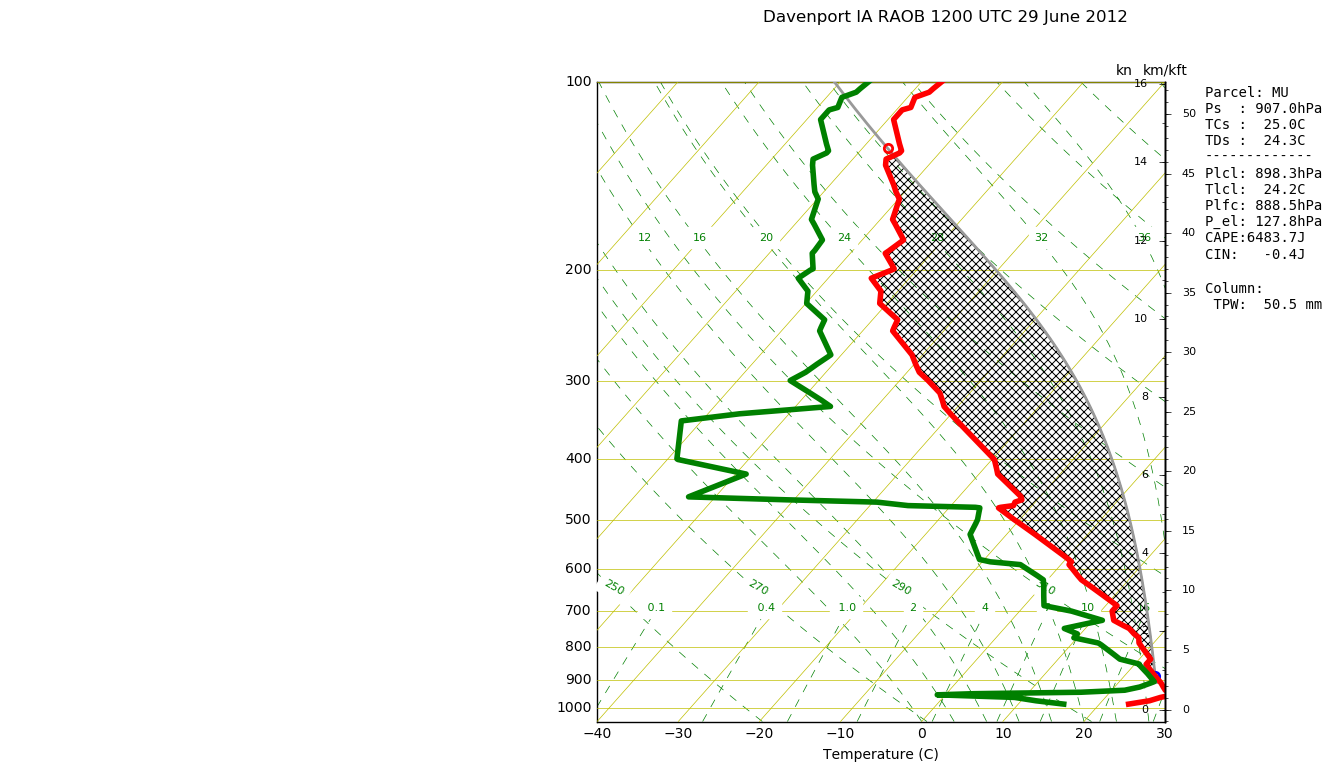

In [7]:
S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='mu')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012')
plt.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012',size=12)
plt.savefig("skewt_dvn_raob_0629_1200_mu.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 3.658
print("Z_UP = ", Z_UP)
P_UP = pressure_pa[26]
print("P_UP = ", P_UP)
T_UP = temperature[26]
print("T_UP = ", T_UP)
TD_UP = dewpoint[26]
print("TD_UP = ", TD_UP)
Z_LO = 1.531
print("Z_LO = ", Z_LO)
P_LO = pressure_pa[13]
print("P_LO = ", P_LO)
T_LO = temperature[13]
print("T_LO = ", T_LO)
TD_LO = dewpoint[13]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

def Haines_H(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 17:
        ST = 1
    elif Tdiff >= 17 and Tdiff <= 21:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 14:
        MT = 1
    elif DD_LO >= 14 and DD_LO <= 20:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
 
def Haines_M(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if Tdiff < 5:
        ST = 1
    elif Tdiff >= 5 and Tdiff <= 10:
        ST = 2
    else:
        ST = 3   
    if DD_LO < 5:
        MT = 1
    elif DD_LO >= 5 and DD_LO <= 12:
        MT = 2
    else:    
        MT = 3
    HI = ST + MT    
    print("ST = ", ST)
    print("MT = ", MT)
    print("HI = ", HI)
    return HI
        
def C_Haines(T_UP, T_LO, TD_LO):
    Tdiff = T_LO - T_UP
    print("Tdiff = ", Tdiff)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    if DD_LO >30:
        DD_LO=30
    CA=((T_LO-T_UP)/2)-2
    CB=((DD_LO)/3)-1
    if CB>5:
        CB=5+(CB-5)/2
    CH=CA+CB
    return CH
         
idx_pup_mid = np.where(pressure_pa == 661.8)
idx_plo_mid = np.where(pressure_pa == 850.0)
T_UP_mid = temperature_c[idx_pup_mid]
print("T_UP_mid = ", T_UP_mid)
T_LO_mid = temperature_c[idx_plo_mid]
print("T_LO_mid = ", T_LO_mid)
TD_LO_mid = dewpoint[idx_plo_mid]
print("TD_LO_mid = ", TD_LO_mid)
    
HI_M = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
HI_H = Haines_H(T_UP, T_LO, TD_LO)
CH = Haines_M(T_UP_mid, T_LO_mid, TD_LO_mid)
    
print("Haines Index MID = ", HI_M)
print("Haines Index HIGH = ", HI_H)
print("C-Haines Index = ", CH)

S=SkewT.Sounding(soundingdata=mydata)
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
parcel=S.get_parcel(method='sb')
S.lift_parcel(*parcel)
print(parcel)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012')
plt.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012',size=12)
plt.savefig("skewt_dvn_raob_0629_1200_sb.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

#Compute the Microburst Windspeed Potential Index (MWPI)
#CAPE = 1033
Z_UP = 3.658
print("Z_UP = ", Z_UP)
P_UP = pressure_pa[26]
print("P_UP = ", P_UP)
T_UP = temperature[26]
print("T_UP = ", T_UP)
TD_UP = dewpoint[26]
print("TD_UP = ", TD_UP)
Z_LO = 1.531
print("Z_LO = ", Z_LO)
P_LO = pressure_pa[13]
print("P_LO = ", P_LO)
T_LO = temperature[13]
print("T_LO = ", T_LO)
TD_LO = dewpoint[13]
print("TD_LO = ", TD_LO)

def MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE):
    gamma = (T_LO - T_UP)/(Z_UP - Z_LO)
    DD_UP = T_UP - TD_UP
    print("DD_UP = ", DD_UP)
    DD_LO = T_LO - TD_LO
    print("DD_LO = ", DD_LO)
    DDD = DD_LO - DD_UP
    if DDD < 0:
        DDD = 0
    print("DDD = ", DDD)
    MWPI_IRv1 = (CAPE/100) + gamma + DDD
    MWPI_IRv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
    WGP_IR = (0.4553 * MWPI_IRv1) + 28.769
    WGP_IRv2 = (0.35435365777*(MWPI_IRv2**2)) + (1.29598552473*MWPI_IRv2) + 33.8176788073
    return gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2
    
gamma, MWPI_IRv1, MWPI_IRv2, WGP_IR, WGP_IRv2 = MWPI(Z_UP, Z_LO, T_UP, T_LO, TD_UP, TD_LO, CAPE)

print("Gamma = ", gamma)
print("MWPI_IRv1 = ", MWPI_IRv1)
print("WGP_IR = ", WGP_IR)
print("MWPI_IRv2 = ", MWPI_IRv2)
print("WGP_IRv2 = ", WGP_IRv2)

temp_p2 = temperature_c[13]
dewpt_p2 = dewpoint_c[13]

fig = plt.figure(figsize=(8, 8))
parcel_2=(850.0, temp_p2, dewpt_p2, 'mwpi')
S.make_skewt_axes(tmin=-40.,tmax=40.,pmin=100.,pmax=1050.)
S.add_profile()
S.lift_parcel(*parcel_2)
print(parcel_2)
P_lcl,P_lfc,P_el,CAPE,CIN=S.get_cape(*parcel)
print("CAPE = ",CAPE)
fig.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012')
plt.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012',size=12)
plt.savefig("skewt_mwpi_dvn_raob_0629_1200.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()

fig = plt.figure(figsize=(8, 8))
S.plot_skewt()
fig.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012')
plt.suptitle('Davenport IA RAOB 1200 UTC 29 June 2012',size=12,horizontalalignment='center',verticalalignment='center')
plt.savefig("skewt_dvn_raob_0629_1200.png",dpi=250,bbox_inches='tight')
print("Figure saved")
plt.show()